I. PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
! pip install tensorflow

In [3]:
! python.exe -m pip install --upgrade pip

In [4]:
import tensorflow 
tensorflow.__version__


'2.16.1'

In [5]:
! pip install keras

In [6]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
from keras.layers import Dropout
import numpy

In [7]:
!pip install --upgrade pip 

In [8]:
forest_data=pd.read_csv("forestfires.csv")

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
forest_data['month']=le.fit_transform(forest_data['month'])
forest_data['day']=le.fit_transform(forest_data['day'])


In [10]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
forest_data['size_category'] = forest_data['size_category'].map({'small': 0, 'large': 1})
forest_data['size_category'] = le.fit_transform(forest_data['size_category'])

In [12]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [14]:
forest_data2= forest_data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area', 'size_category']]

In [15]:
forest_data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


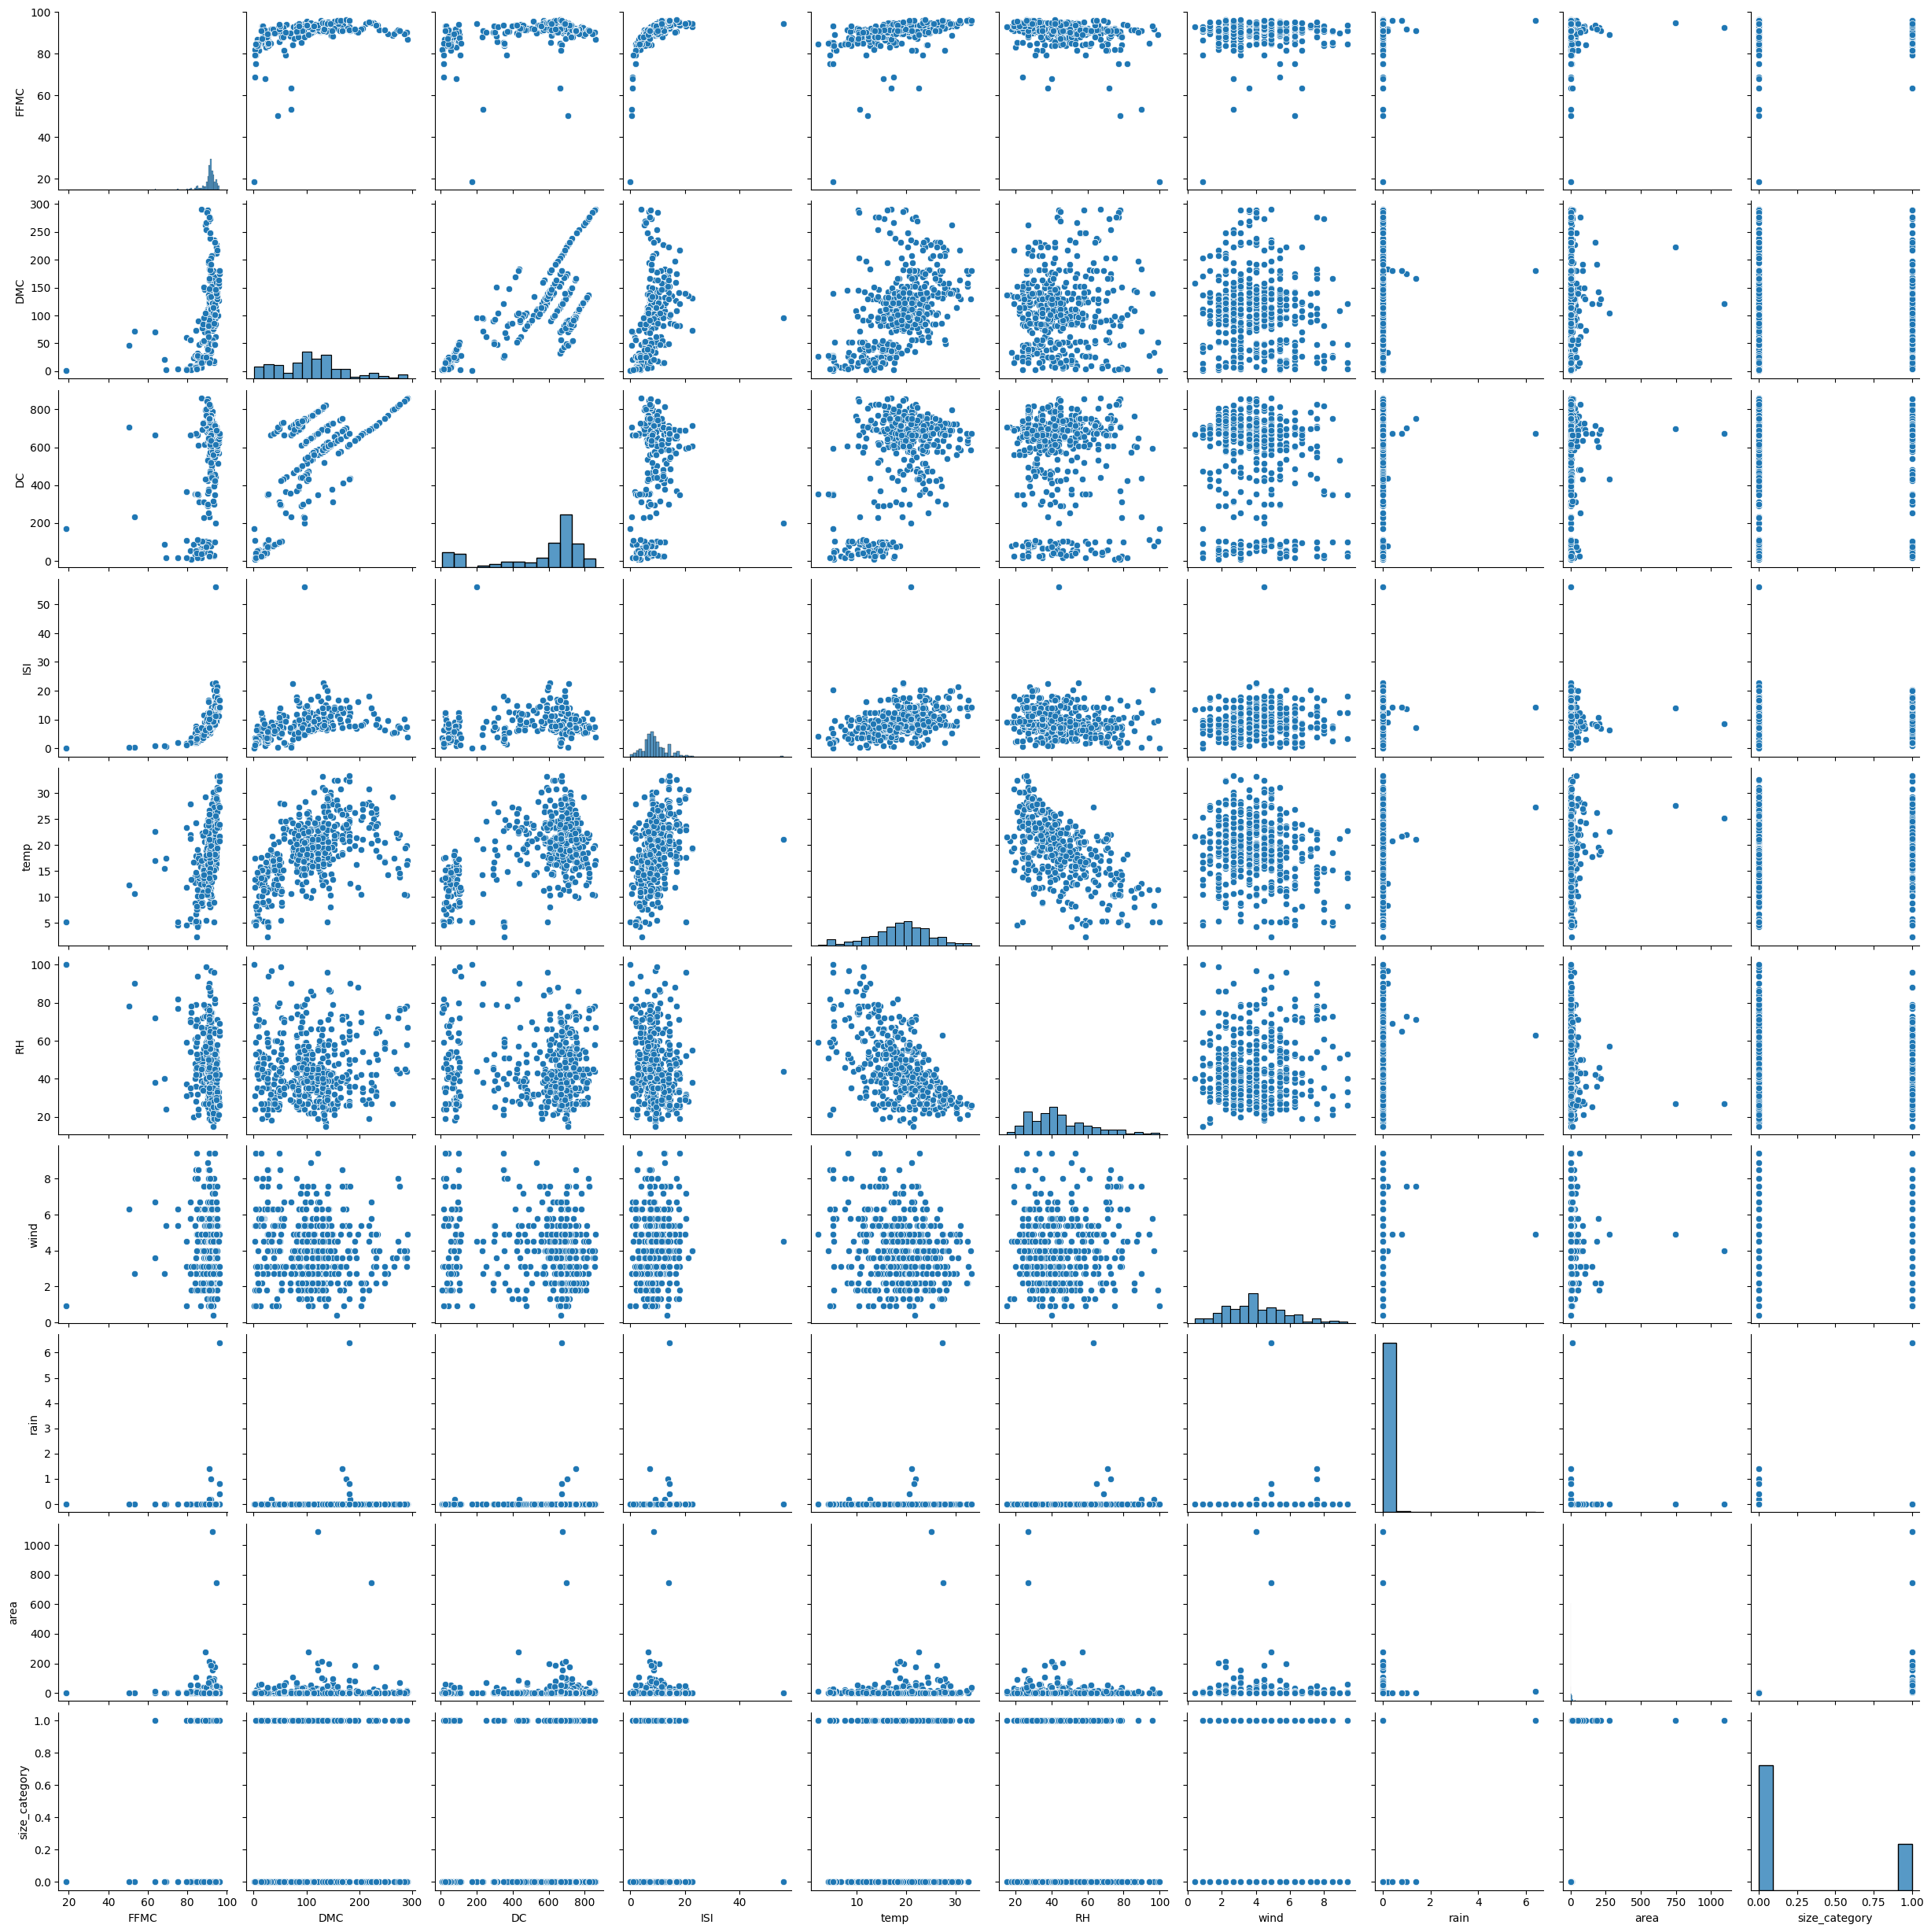

In [16]:
forest_data3 = pd.concat([forest_data2.iloc[:,0:9],forest_data2.iloc[:,-1]],axis = 1)
sns.pairplot(forest_data3)
plt.show()

In [61]:
x = np.array(forest_data2.iloc[:,0:9])
y = np.array(forest_data2.iloc[:,9])

In [62]:
x

array([[ 86.2 ,  26.2 ,  94.3 , ...,   6.7 ,   0.  ,   0.  ],
       [ 90.6 ,  35.4 , 669.1 , ...,   0.9 ,   0.  ,   0.  ],
       [ 90.6 ,  43.7 , 686.9 , ...,   1.3 ,   0.  ,   0.  ],
       ...,
       [ 81.6 ,  56.7 , 665.6 , ...,   6.7 ,   0.  ,  11.16],
       [ 94.4 , 146.  , 614.7 , ...,   4.  ,   0.  ,   0.  ],
       [ 79.5 ,   3.  , 106.7 , ...,   4.5 ,   0.  ,   0.  ]])

In [63]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [65]:
model = Sequential()
model.add(Dense(20, input_dim=9, activation='relu')) # 1st layer, by default value is 1
model.add(Dense(10, activation='relu')) # 2nd layer
model.add(Dense(10, activation='relu')) # 3rd layer
model.add(Dense(1, activation='sigmoid')) # 4th layer or output. it is always 1


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # metrices and optimizer will always be the same

In [67]:
# Predict on the test set
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531 (2.07 KB)

 Trainable params: 531 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(x,y, validation_split=0.33, epochs=250, batch_size=10) 

Epoch 1/250


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2401 - loss: 111.5007 - val_accuracy: 0.3684 - val_loss: 1.3809
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 1.8927 - val_accuracy: 0.6608 - val_loss: 1.1141
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6122 - loss: 0.8509 - val_accuracy: 0.6608 - val_loss: 1.3385
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.6224 - val_accuracy: 0.6725 - val_loss: 0.9786
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5962 - val_accuracy: 0.6842 - val_loss: 0.9419
Epoch 6/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7528 - loss: 0.5541 - val_accuracy: 0.7018 - val_loss: 1.1240
Epoch 7/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4617 - val_accuracy: 0.6901 - val_loss: 1.0250
Epoch 8/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.5026 - val_accuracy: 0.7076 - val_loss: 0

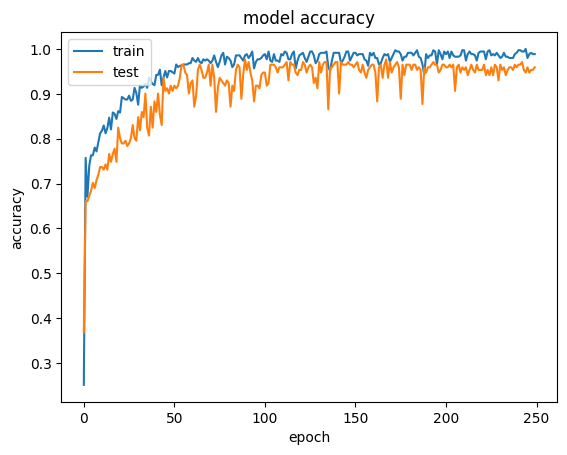

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

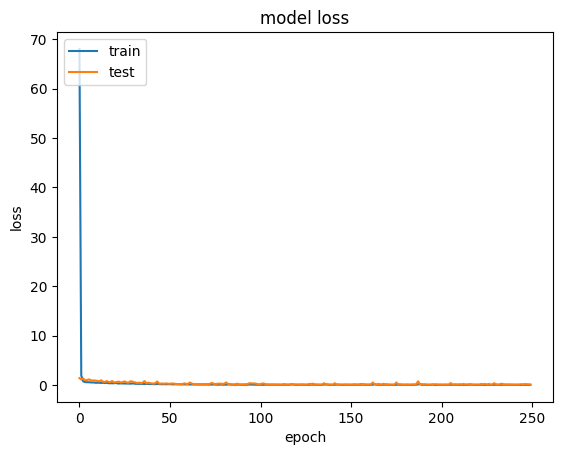

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

-------------------------------------------------------------------------------------------------------

### II. Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [225]:
turbine_data = pd.read_csv('gas_turbines.csv')
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [226]:
turbine_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [227]:
turbine_data2=turbine_data[['AT', 'AP', 'AH', 'TEY']]
turbine_data2

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [228]:
turbine_data2

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [229]:
x = np.array(turbine_data2.iloc[:,0:3])
y = np.array(turbine_data2.iloc[:,3])

In [230]:
x

array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [231]:
def categorize_tey(TEY):
    if TEY >= 100 and TEY < 130:
        return 1
    elif TEY >= 130 and TEY < 160:
        return 2
    elif TEY >= 160 and TEY < 200:
        return 3
    else:
        return None

In [232]:
y_categorized=np.array([categorize_tey(TEY) for TEY in y])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_categorized)

In [233]:
y=np.array(y_encoded)

In [234]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [236]:
model=Sequential()
model.add(Dense(20, input_dim=3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [237]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [238]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 20)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
history=model.fit(x_train,y_train,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250


806/806 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6197 - loss: 1.1764 - val_accuracy: 0.6605 - val_loss: 0.3655
Epoch 2/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6326 - loss: 0.4665 - val_accuracy: 0.6122 - val_loss: 0.3730
Epoch 3/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6133 - loss: 0.5010 - val_accuracy: 0.6605 - val_loss: 0.6790
Epoch 4/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6080 - loss: 0.5180 - val_accuracy: 0.6434 - val_loss: 0.3274
Epoch 5/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6244 - loss: 0.4239 - val_accuracy: 0.6510 - val_loss: 0.3484
Epoch 6/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6156 - loss: 0.4881 - val_accuracy: 0.6588 - val_loss: 0.4341
Epoch 7/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6100 - loss: 0.5159 - val_accuracy: 0.6414 - val_loss: 0.3275
Epoch 8/250
806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6211 - loss: 0.4176 - val_accuracy: 0.6089

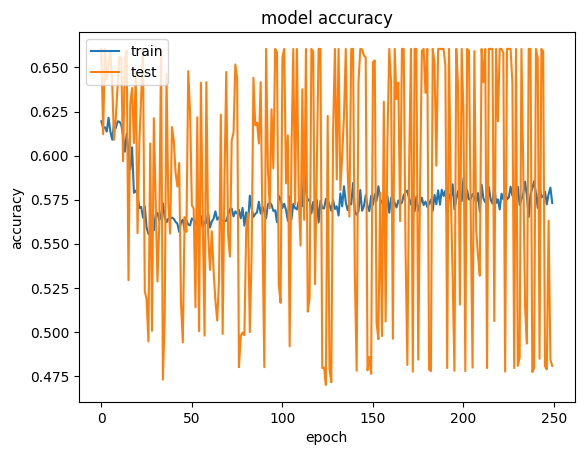

In [240]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

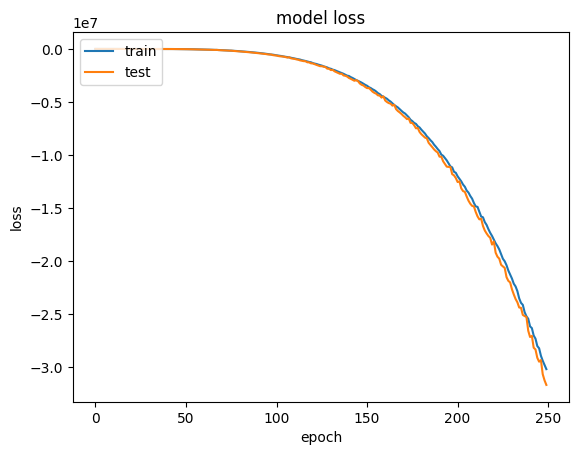

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()